### ÎëêÍ∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Ìï©ÏπòÍ≥† Ï≤òÎ¶¨ÌïòÍ∏∞

### Îç∞Ïù¥ÌÑ∞ Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏ 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* ÏΩîÎ°úÎÇò 19(COVID-19) Ïã§ÏãúÍ∞Ñ ÏÉÅÌô©Ìåê
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [6]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '01_dataScraping_corona02.py',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [9]:
path = os.getcwd() + '\\data'

In [10]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16datamerge.csv
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16datamerge.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_today_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_today_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_vaccine_bloomberg.csv


In [11]:
import pandas as pd

# excel Îç∞Ïù¥ÌÑ∞ ÏÖãÎèÑ pd.read_excelÎ°ú Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏùå.
corona = pd.read_csv("./data/2021-09-28_corona.csv")
vaccine = pd.read_csv("./data/20210929_00_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((222, 12), (207, 6), (227, 4))

In [12]:
corona.head()

Íµ≠Í∞Ä          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº  \
0   ÎØ∏Íµ≠üá∫üá∏  21819\n-275   1.6   76.0  132772   331002651  43942335  187382.0   
1   Ïù∏ÎèÑüáÆüá≥         8944   1.3   97.8   24431  1380004385  33714241   21093.0   
2  Î∏åÎùºÏßàüáßüá∑         8318   2.8   95.3  100520   212559417  21366395   14423.0   
3   ÏòÅÍµ≠üá¨üáß     878\n-38   1.8   80.7  113959    67886011   7701715   37485.0   
4  Îü¨ÏãúÏïÑüá∑üá∫         2300   2.8   88.9   51151   145934462   7464708   21559.0   

    ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº  
0  709119  2781.0  33394833.0  208564.0  
1  447699   337.0  32976760.0   28144.0  
2  594702   218.0  20361191.0   20818.0  
3  136208    40.0   6219111.0   33541.0  
4  205531   852.0   6635485.0   17368.0

In [13]:
vaccine.head()

Íµ≠Í∞Ä         Î∞±Ïã†Ï†ëÏ¢ÖÏàò  Enough_for_percent_of_people:   1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö  \
0    Global Total  6.172363e+09                         -999.0 -999.0 -999.0   
1  Mainland China  2.200202e+09                           78.6   78.6   73.0   
2           India  8.705669e+08                           31.8   46.2   16.4   
3              EU  5.629421e+08                           63.4   67.2   64.6   
4            U.S.  3.901143e+08                           60.9   64.3   55.3   

        ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò  
0  31740868.0  
1   3223429.0  
2   7488509.0  
3    999304.0  
4    716762.0

In [14]:
country_code.head()

Íµ≠Î¨∏(ÏΩîÎ°úÎÇòÎ≥¥Îìú) ÏòÅÎ¨∏(Î∏îÎ£∏Î≤ÑÍ∑∏)   ÎÇòÎùº        ÎπÑÍ≥†_Îúª
0        Í∞ÄÎÇò    Ghana  NaN         NaN
1        Í∞ÄÎ¥â    Gabon  NaN         NaN
2      Í∞ÄÏù¥ÏïÑÎÇò   Guyana  NaN         NaN
3       Í∞êÎπÑÏïÑ   Gambia  NaN         NaN
4      Í≥ºÎì§Î£®ÌîÑ      NaN  ÌîÑÎûëÏä§  Guadeloupe

### ÏΩîÎ°úÎÇòÏóê ÎÇòÎùºÎ™ÖÏù¥ ÏûàÏúºÎ©¥ Ìï¥ÎãπÎêòÎäî Ïó¥ÏùÑ Î∂ôÏó¨Îùº

In [15]:
corona['Íµ≠Í∞Ä'].str.extract('([„Ñ±-„Ö£Í∞Ä-Ìû£]+)')

0
0        ÎØ∏Íµ≠
1        Ïù∏ÎèÑ
2       Î∏åÎùºÏßà
3        ÏòÅÍµ≠
4       Îü¨ÏãúÏïÑ
..      ...
217      ÎßàÏÖú
218    Î∞îÎàÑÏïÑÌà¨
219     ÏÇ¨Î™®ÏïÑ
220  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò
221  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ

[222 rows x 1 columns]

In [19]:
corona['ÌïúÍ∏ÄÌëúÍ∏∞'] = corona['Íµ≠Í∞Ä'].str.extract('([„Ñ±-„Ö£Í∞Ä-Ìû£]+)', expand=False)
corona.columns


Index(['Íµ≠Í∞Ä', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ',
       'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'hangul_code', 'ÌïúÍ∏ÄÌëúÍ∏∞'],
      dtype='object')

In [20]:
col = ['Íµ≠Í∞Ä', 'ÌïúÍ∏ÄÌëúÍ∏∞', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 
       'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº']

new_corona = corona[col].copy()
new_corona

Íµ≠Í∞Ä    ÌïúÍ∏ÄÌëúÍ∏∞          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0        ÎØ∏Íµ≠üá∫üá∏      ÎØ∏Íµ≠  21819\n-275   1.6   76.0  132772   331002651  43942335   
1        Ïù∏ÎèÑüáÆüá≥      Ïù∏ÎèÑ         8944   1.3   97.8   24431  1380004385  33714241   
2       Î∏åÎùºÏßàüáßüá∑     Î∏åÎùºÏßà         8318   2.8   95.3  100520   212559417  21366395   
3        ÏòÅÍµ≠üá¨üáß      ÏòÅÍµ≠     878\n-38   1.8   80.7  113959    67886011   7701715   
4       Îü¨ÏãúÏïÑüá∑üá∫     Îü¨ÏãúÏïÑ         2300   2.8   88.9   51151   145934462   7464708   
..        ...     ...          ...   ...    ...     ...         ...       ...   
217   ÎßàÏÖú Ï†úÎèÑüá≤üá≠      ÎßàÏÖú          NaN     -  100.0      68       59190         4   
218    Î∞îÎàÑÏïÑÌà¨üáªüá∫    Î∞îÎàÑÏïÑÌà¨          NaN    25   75.0      13      307145         4   
219     ÏÇ¨Î™®ÏïÑüáºüá∏     ÏÇ¨Î™®ÏïÑ          NaN     -  100.0      15      198414         3   
220  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇòüá∏üá≠  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò          NaN     -  100.0     329        6077         2   
221  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑüá´üá≤  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ          NaN     -  100.0       9      115023         1   

        ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº  
0    187382.0  709119  2781.0  33394833.0  208564.0  
1     21093.0  447699   337.0  32976760.0   28144.0  
2     14423.0  594702   218.0  20361191.0   20818.0  
3     37485.0  136208    40.0   6219111.0   33541.0  
4     21559.0  205531   852.0   6635485.0   17368.0  
..        ...     ...     ...         ...       ...  
217       NaN       0     NaN         4.0       NaN  
218       NaN       1     NaN         3.0       NaN  
219       NaN       0     NaN         3.0       NaN  
220       NaN       0     NaN         2.0       NaN  
221       NaN       0     NaN         1.0       NaN  

[222 rows x 13 columns]

### Îëê Îç∞Ïù¥ÌÑ∞ ÏÖã Ïó∞Í≤∞

In [21]:
new_corona.head()

Íµ≠Í∞Ä ÌïúÍ∏ÄÌëúÍ∏∞          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0   ÎØ∏Íµ≠üá∫üá∏   ÎØ∏Íµ≠  21819\n-275   1.6   76.0  132772   331002651  43942335   
1   Ïù∏ÎèÑüáÆüá≥   Ïù∏ÎèÑ         8944   1.3   97.8   24431  1380004385  33714241   
2  Î∏åÎùºÏßàüáßüá∑  Î∏åÎùºÏßà         8318   2.8   95.3  100520   212559417  21366395   
3   ÏòÅÍµ≠üá¨üáß   ÏòÅÍµ≠     878\n-38   1.8   80.7  113959    67886011   7701715   
4  Îü¨ÏãúÏïÑüá∑üá∫  Îü¨ÏãúÏïÑ         2300   2.8   88.9   51151   145934462   7464708   

      ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº  
0  187382.0  709119  2781.0  33394833.0  208564.0  
1   21093.0  447699   337.0  32976760.0   28144.0  
2   14423.0  594702   218.0  20361191.0   20818.0  
3   37485.0  136208    40.0   6219111.0   33541.0  
4   21559.0  205531   852.0   6635485.0   17368.0

In [22]:
country_code.head()

Íµ≠Î¨∏(ÏΩîÎ°úÎÇòÎ≥¥Îìú) ÏòÅÎ¨∏(Î∏îÎ£∏Î≤ÑÍ∑∏)   ÎÇòÎùº        ÎπÑÍ≥†_Îúª
0        Í∞ÄÎÇò    Ghana  NaN         NaN
1        Í∞ÄÎ¥â    Gabon  NaN         NaN
2      Í∞ÄÏù¥ÏïÑÎÇò   Guyana  NaN         NaN
3       Í∞êÎπÑÏïÑ   Gambia  NaN         NaN
4      Í≥ºÎì§Î£®ÌîÑ      NaN  ÌîÑÎûëÏä§  Guadeloupe

In [23]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

han_code eng_code country         etc
0       Í∞ÄÎÇò    Ghana     NaN         NaN
1       Í∞ÄÎ¥â    Gabon     NaN         NaN
2     Í∞ÄÏù¥ÏïÑÎÇò   Guyana     NaN         NaN
3      Í∞êÎπÑÏïÑ   Gambia     NaN         NaN
4     Í≥ºÎì§Î£®ÌîÑ      NaN     ÌîÑÎûëÏä§  Guadeloupe

In [24]:
df_corona = new_corona.merge(country_code, left_on='ÌïúÍ∏ÄÌëúÍ∏∞', 
                             right_on='han_code')

df_corona.head()

Íµ≠Í∞Ä ÌïúÍ∏ÄÌëúÍ∏∞          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
0   ÎØ∏Íµ≠üá∫üá∏   ÎØ∏Íµ≠  21819\n-275   1.6   76.0  132772   331002651  43942335   
1   Ïù∏ÎèÑüáÆüá≥   Ïù∏ÎèÑ         8944   1.3   97.8   24431  1380004385  33714241   
2  Î∏åÎùºÏßàüáßüá∑  Î∏åÎùºÏßà         8318   2.8   95.3  100520   212559417  21366395   
3   ÏòÅÍµ≠üá¨üáß   ÏòÅÍµ≠     878\n-38   1.8   80.7  113959    67886011   7701715   
4  Îü¨ÏãúÏïÑüá∑üá∫  Îü¨ÏãúÏïÑ         2300   2.8   88.9   51151   145934462   7464708   

      ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº han_code eng_code country  \
0  187382.0  709119  2781.0  33394833.0  208564.0       ÎØ∏Íµ≠     U.S.     NaN   
1   21093.0  447699   337.0  32976760.0   28144.0       Ïù∏ÎèÑ    India     NaN   
2   14423.0  594702   218.0  20361191.0   20818.0      Î∏åÎùºÏßà   Brazil     NaN   
3   37485.0  136208    40.0   6219111.0   33541.0       ÏòÅÍµ≠     U.K.     NaN   
4   21559.0  205531   852.0   6635485.0   17368.0      Îü¨ÏãúÏïÑ   Russia     NaN   

   etc  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [25]:
df_corona.drop(['Íµ≠Í∞Ä', 'han_code', 'country', 'etc'], axis=1, inplace=True)
df_corona.head()

ÌïúÍ∏ÄÌëúÍ∏∞          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº  \
0   ÎØ∏Íµ≠  21819\n-275   1.6   76.0  132772   331002651  43942335  187382.0   
1   Ïù∏ÎèÑ         8944   1.3   97.8   24431  1380004385  33714241   21093.0   
2  Î∏åÎùºÏßà         8318   2.8   95.3  100520   212559417  21366395   14423.0   
3   ÏòÅÍµ≠     878\n-38   1.8   80.7  113959    67886011   7701715   37485.0   
4  Îü¨ÏãúÏïÑ         2300   2.8   88.9   51151   145934462   7464708   21559.0   

    ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº eng_code  
0  709119  2781.0  33394833.0  208564.0     U.S.  
1  447699   337.0  32976760.0   28144.0    India  
2  594702   218.0  20361191.0   20818.0   Brazil  
3  136208    40.0   6219111.0   33541.0     U.K.  
4  205531   852.0   6635485.0   17368.0   Russia

In [26]:
vaccine.head()

Íµ≠Í∞Ä         Î∞±Ïã†Ï†ëÏ¢ÖÏàò  Enough_for_percent_of_people:   1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö  \
0    Global Total  6.172363e+09                         -999.0 -999.0 -999.0   
1  Mainland China  2.200202e+09                           78.6   78.6   73.0   
2           India  8.705669e+08                           31.8   46.2   16.4   
3              EU  5.629421e+08                           63.4   67.2   64.6   
4            U.S.  3.901143e+08                           60.9   64.3   55.3   

        ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò  
0  31740868.0  
1   3223429.0  
2   7488509.0  
3    999304.0  
4    716762.0

In [27]:
df_corona_all = df_corona.merge(vaccine, left_on='eng_code', right_on='Íµ≠Í∞Ä')
df_corona_all.head()

ÌïúÍ∏ÄÌëúÍ∏∞          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº  \
0   ÎØ∏Íµ≠  21819\n-275   1.6   76.0  132772   331002651  43942335  187382.0   
1   Ïù∏ÎèÑ         8944   1.3   97.8   24431  1380004385  33714241   21093.0   
2  Î∏åÎùºÏßà         8318   2.8   95.3  100520   212559417  21366395   14423.0   
3   ÏòÅÍµ≠     878\n-38   1.8   80.7  113959    67886011   7701715   37485.0   
4  Îü¨ÏãúÏïÑ         2300   2.8   88.9   51151   145934462   7464708   21559.0   

    ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº eng_code      Íµ≠Í∞Ä        Î∞±Ïã†Ï†ëÏ¢ÖÏàò  \
0  709119  2781.0  33394833.0  208564.0     U.S.    U.S.  390114340.0   
1  447699   337.0  32976760.0   28144.0    India   India  870566900.0   
2  594702   218.0  20361191.0   20818.0   Brazil  Brazil  232250880.0   
3  136208    40.0   6219111.0   33541.0     U.K.    U.K.   93500856.0   
4  205531   852.0   6635485.0   17368.0   Russia  Russia   89682024.0   

   Enough_for_percent_of_people:  1Ï∞®Ï†ëÏ¢Ö  2Ï∞®Ï†ëÏ¢Ö      ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò  
0                           60.9  64.3  55.3   716762.0  
1                           31.8  46.2  16.4  7488509.0  
2                           56.3  71.1  41.4  3757702.0  
3                           70.0  73.0  67.0    63103.0  
4                           30.6  32.4  28.4   220487.0

In [28]:
df_corona_all.drop(['Íµ≠Í∞Ä'], axis=1, inplace=True)
df_corona_all

ÌïúÍ∏ÄÌëúÍ∏∞          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº  \
0        ÎØ∏Íµ≠  21819\n-275   1.6   76.0  132772   331002651  43942335  187382.0   
1        Ïù∏ÎèÑ         8944   1.3   97.8   24431  1380004385  33714241   21093.0   
2       Î∏åÎùºÏßà         8318   2.8   95.3  100520   212559417  21366395   14423.0   
3        ÏòÅÍµ≠     878\n-38   1.8   80.7  113959    67886011   7701715   37485.0   
4       Îü¨ÏãúÏïÑ         2300   2.8   88.9   51151   145934462   7464708   21559.0   
..      ...          ...   ...    ...     ...         ...       ...       ...   
173     ÎßàÏπ¥Ïò§          NaN     -   90.0     108      649335        70       3.0   
174    Î™¨Ìä∏ÏÑ∏Îû´          NaN   3.0   90.9    6611        4992        33       NaN   
175     ÏÇ¨Î™®ÏïÑ          NaN     -  100.0      15      198414         3       NaN   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò          NaN     -  100.0     329        6077         2       NaN   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ          NaN     -  100.0       9      115023         1       NaN   

      ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº    eng_code        Î∞±Ïã†Ï†ëÏ¢ÖÏàò  \
0    709119  2781.0  33394833.0  208564.0        U.S.  390114340.0   
1    447699   337.0  32976760.0   28144.0       India  870566900.0   
2    594702   218.0  20361191.0   20818.0      Brazil  232250880.0   
3    136208    40.0   6219111.0   33541.0        U.K.   93500856.0   
4    205531   852.0   6635485.0   17368.0      Russia   89682024.0   
..      ...     ...         ...       ...         ...          ...   
173       0     NaN        63.0       NaN       Macau     649564.0   
174       1     NaN        30.0       NaN  Montserrat       2871.0   
175       0     NaN         3.0       NaN       Samoa     149431.0   
176       0     NaN         2.0       NaN  St. Helena       7892.0   
177       0     NaN         1.0       NaN  Micronesia      72085.0   

     Enough_for_percent_of_people:  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö      ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò  
0                             60.9  64.3   55.3   716762.0  
1                             31.8  46.2   16.4  7488509.0  
2                             56.3  71.1   41.4  3757702.0  
3                             70.0  73.0   67.0    63103.0  
4                             30.6  32.4   28.4   220487.0  
..                             ...   ...    ...        ...  
173                           47.8  51.2   44.6     4123.0  
174                           28.7  29.7   27.8        2.0  
175                           37.2  49.3   25.0      981.0  
176                           65.8  72.7   58.9        8.0  
177                           34.7  41.6 -999.0      297.0  

[178 rows x 18 columns]

In [29]:
df_corona_all.columns

Index(['ÌïúÍ∏ÄÌëúÍ∏∞', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº',
       'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'eng_code', 'Î∞±Ïã†Ï†ëÏ¢ÖÏàò',
       'Enough_for_percent_of_people:', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò'],
      dtype='object')

In [31]:
sel = ['ÌïúÍ∏ÄÌëúÍ∏∞', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº',
       'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Î∞±Ïã†Ï†ëÏ¢ÖÏàò',
       'Enough_for_percent_of_people:', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö',  'ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n

ÌïúÍ∏ÄÌëúÍ∏∞    eng_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0        ÎØ∏Íµ≠        U.S.  21819\n-275   1.6   76.0  132772   331002651   
1        Ïù∏ÎèÑ       India         8944   1.3   97.8   24431  1380004385   
2       Î∏åÎùºÏßà      Brazil         8318   2.8   95.3  100520   212559417   
3        ÏòÅÍµ≠        U.K.     878\n-38   1.8   80.7  113959    67886011   
4       Îü¨ÏãúÏïÑ      Russia         2300   2.8   88.9   51151   145934462   
..      ...         ...          ...   ...    ...     ...         ...   
173     ÎßàÏπ¥Ïò§       Macau          NaN     -   90.0     108      649335   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat          NaN   3.0   90.9    6611        4992   
175     ÏÇ¨Î™®ÏïÑ       Samoa          NaN     -  100.0      15      198414   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena          NaN     -  100.0     329        6077   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº        Î∞±Ïã†Ï†ëÏ¢ÖÏàò  \
0    43942335  187382.0  709119  2781.0  33394833.0  208564.0  390114340.0   
1    33714241   21093.0  447699   337.0  32976760.0   28144.0  870566900.0   
2    21366395   14423.0  594702   218.0  20361191.0   20818.0  232250880.0   
3     7701715   37485.0  136208    40.0   6219111.0   33541.0   93500856.0   
4     7464708   21559.0  205531   852.0   6635485.0   17368.0   89682024.0   
..        ...       ...     ...     ...         ...       ...          ...   
173        70       3.0       0     NaN        63.0       NaN     649564.0   
174        33       NaN       1     NaN        30.0       NaN       2871.0   
175         3       NaN       0     NaN         3.0       NaN     149431.0   
176         2       NaN       0     NaN         2.0       NaN       7892.0   
177         1       NaN       0     NaN         1.0       NaN      72085.0   

     Enough_for_percent_of_people:  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö      ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò  
0                             60.9  64.3   55.3   716762.0  
1                             31.8  46.2   16.4  7488509.0  
2                             56.3  71.1   41.4  3757702.0  
3                             70.0  73.0   67.0    63103.0  
4                             30.6  32.4   28.4   220487.0  
..                             ...   ...    ...        ...  
173                           47.8  51.2   44.6     4123.0  
174                           28.7  29.7   27.8        2.0  
175                           37.2  49.3   25.0      981.0  
176                           65.8  72.7   58.9        8.0  
177                           34.7  41.6 -999.0      297.0  

[178 rows x 18 columns]

In [32]:
df_corona_all_n.columns

Index(['ÌïúÍ∏ÄÌëúÍ∏∞', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Î∞±Ïã†Ï†ëÏ¢ÖÏàò',
       'Enough_for_percent_of_people:', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏùºÎ≥ÑÏ†ëÏ¢ÖÏàò'],
      dtype='object')

In [33]:
df_corona_all_n.columns = ['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº','Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö',
       'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)']
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0        ÎØ∏Íµ≠        U.S.  21819\n-275   1.6   76.0  132772   331002651   
1        Ïù∏ÎèÑ       India         8944   1.3   97.8   24431  1380004385   
2       Î∏åÎùºÏßà      Brazil         8318   2.8   95.3  100520   212559417   
3        ÏòÅÍµ≠        U.K.     878\n-38   1.8   80.7  113959    67886011   
4       Îü¨ÏãúÏïÑ      Russia         2300   2.8   88.9   51151   145934462   
..      ...         ...          ...   ...    ...     ...         ...   
173     ÎßàÏπ¥Ïò§       Macau          NaN     -   90.0     108      649335   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat          NaN   3.0   90.9    6611        4992   
175     ÏÇ¨Î™®ÏïÑ       Samoa          NaN     -  100.0      15      198414   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena          NaN     -  100.0     329        6077   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº         Î∞±Ïã†Ï†ëÏ¢Ö  \
0    43942335  187382.0  709119  2781.0  33394833.0  208564.0  390114340.0   
1    33714241   21093.0  447699   337.0  32976760.0   28144.0  870566900.0   
2    21366395   14423.0  594702   218.0  20361191.0   20818.0  232250880.0   
3     7701715   37485.0  136208    40.0   6219111.0   33541.0   93500856.0   
4     7464708   21559.0  205531   852.0   6635485.0   17368.0   89682024.0   
..        ...       ...     ...     ...         ...       ...          ...   
173        70       3.0       0     NaN        63.0       NaN     649564.0   
174        33       NaN       1     NaN        30.0       NaN       2871.0   
175         3       NaN       0     NaN         3.0       NaN     149431.0   
176         2       NaN       0     NaN         2.0       NaN       7892.0   
177         1       NaN       0     NaN         1.0       NaN      72085.0   

     Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0         60.9  64.3   55.3   716762.0  
1         31.8  46.2   16.4  7488509.0  
2         56.3  71.1   41.4  3757702.0  
3         70.0  73.0   67.0    63103.0  
4         30.6  32.4   28.4   220487.0  
..         ...   ...    ...        ...  
173       47.8  51.2   44.6     4123.0  
174       28.7  29.7   27.8        2.0  
175       37.2  49.3   25.0      981.0  
176       65.8  72.7   58.9        8.0  
177       34.7  41.6 -999.0      297.0  

[178 rows x 18 columns]

In [34]:
df_corona_all_n.sort_values(['2Ï∞®Ï†ëÏ¢Ö'], ascending=False)

Íµ≠Í∞ÄÎ™Ö     eng_code     ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†       Ïù∏Íµ¨Ïàò   ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
161     ÏßÄÎ∏åÎ°§ÌÑ∞    Gibraltar       2   1.8   97.1  164198     33691     5532   
110      Î™∞ÎîîÎ∏å     Maldives      23   0.3   97.9  156294    540544    84484   
33      Ìè¨Î•¥Ìà¨Í∞à     Portugal  74\n-5   1.7   95.5  104718  10196709  1067775   
81       Ïπ¥ÌÉÄÎ•¥        Qatar      16   0.3   99.2   82082   2881053   236482   
108     Ïã±Í∞ÄÌè¨Î•¥    Singapore  27\n-3   0.1   84.0   15305   5850342    89539   
..       ...          ...     ...   ...    ...     ...       ...      ...   
129       Î≤†ÎÉâ        Benin       5   0.7   75.3    1894  12123200    22958   
149      ÎÇ®ÏàòÎã®  South Sudan       4   1.1   96.8    1068  11193725    11954   
153       ÏòàÎ©ò        Yemen      23  18.9   62.0     301  29825964     8988   
116  ÏΩ©Í≥†ÎØºÏ£ºÍ≥µÌôîÍµ≠     DR Congo     NaN   1.9   54.3     635  89561403    56862   
177   ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ   Micronesia     NaN     -  100.0       9    115023        1   

      ÌôïÏßÑÏûê1Ïùº  ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº       ÏôÑÏπòÌï©Í≥Ñ    ÏôÑÏπò1Ïùº        Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)   1Ï∞®Ï†ëÏ¢Ö  \
161    15.0     97    NaN     5373.0     8.0     79502.0      116.9  117.4   
110   122.0    231    NaN    82676.0   109.0    727664.0       97.8  105.3   
33    600.0  17962    7.0  1019266.0  1331.0  15944324.0       77.6   86.9   
81     94.0    605    NaN   234545.0   120.0   4696753.0       84.0   84.4   
108  1647.0     80    2.0    75176.0   524.0   9286999.0       81.4   82.1   
..      ...    ...    ...        ...     ...         ...        ...    ...   
129     NaN    154    NaN    17294.0     NaN    226269.0        1.0    1.3   
149     6.0    128    NaN    11570.0   148.0    103751.0        0.4    0.6   
153     NaN   1703    NaN     5570.0     NaN    322934.0        0.5    1.0   
116   245.0   1084    1.0    30858.0     NaN    134945.0        0.1    0.1   
177     NaN      0    NaN        1.0     NaN     72085.0       34.7   41.6   

       2Ï∞®Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
161  116.40      28.0  
110   90.30     756.0  
33    84.00   31090.0  
81    79.40    4560.0  
108   79.20   22820.0  
..      ...       ...  
129    0.20    1696.0  
149    0.20    1102.0  
153    0.05     244.0  
116    0.05     637.0  
177 -999.00     297.0  

[178 rows x 18 columns]

In [35]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Íµ≠Í∞ÄÎ™Ö        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   ÏúÑÏ§ëÏ¶ù        131 non-null    object 
 3   ÏπòÎ™Ö(%)      178 non-null    object 
 4   ÏôÑÏπò(%)      175 non-null    float64
 5   Î∞úÏÉùÎ•†        178 non-null    object 
 6   Ïù∏Íµ¨Ïàò        178 non-null    object 
 7   ÌôïÏßÑÏûê_Ìï©Í≥Ñ     178 non-null    int64  
 8   ÌôïÏßÑÏûê1Ïùº      151 non-null    float64
 9   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ      178 non-null    int64  
 10  ÏÇ¨ÎßùÏûê1Ïùº      121 non-null    float64
 11  ÏôÑÏπòÌï©Í≥Ñ       175 non-null    float64
 12  ÏôÑÏπò1Ïùº       133 non-null    float64
 13  Î∞±Ïã†Ï†ëÏ¢Ö       178 non-null    float64
 14  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  178 non-null    float64
 15  1Ï∞®Ï†ëÏ¢Ö       178 non-null    float64
 16  2Ï∞®Ï†ëÏ¢Ö       178 non-null    float64
 17  Ï†ëÏ¢ÖÎπÑÏú®(Ï

In [36]:
df_corona_all_n['Î∞úÏÉùÎ•†'] = df_corona_all_n['Î∞úÏÉùÎ•†'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Íµ≠Í∞ÄÎ™Ö        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   ÏúÑÏ§ëÏ¶ù        131 non-null    object 
 3   ÏπòÎ™Ö(%)      178 non-null    object 
 4   ÏôÑÏπò(%)      175 non-null    float64
 5   Î∞úÏÉùÎ•†        178 non-null    int32  
 6   Ïù∏Íµ¨Ïàò        178 non-null    object 
 7   ÌôïÏßÑÏûê_Ìï©Í≥Ñ     178 non-null    int64  
 8   ÌôïÏßÑÏûê1Ïùº      151 non-null    float64
 9   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ      178 non-null    int64  
 10  ÏÇ¨ÎßùÏûê1Ïùº      121 non-null    float64
 11  ÏôÑÏπòÌï©Í≥Ñ       175 non-null    float64
 12  ÏôÑÏπò1Ïùº       133 non-null    float64
 13  Î∞±Ïã†Ï†ëÏ¢Ö       178 non-null    float64
 14  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  178 non-null    float64
 15  1Ï∞®Ï†ëÏ¢Ö       178 non-null    float64
 16  2Ï∞®Ï†ëÏ¢Ö       178 non-null    float64
 17  Ï†ëÏ¢ÖÎπÑÏú®(Ï

In [37]:
df_corona_all_n['Î∞úÏÉùÎ•†_ÏàúÏúÑ'] = df_corona_all_n['Î∞úÏÉùÎ•†'].rank(ascending=False) # ascending=False : ÎÇ¥Î¶ºÏ∞®Ïàú
df_corona_all_n['Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ'] = df_corona_all_n['Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)'].rank(ascending=False) # ascending=False : ÎÇ¥Î¶ºÏ∞®Ïàú
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò  \
0        ÎØ∏Íµ≠        U.S.  21819\n-275   1.6   76.0  132772   331002651   
1        Ïù∏ÎèÑ       India         8944   1.3   97.8   24431  1380004385   
2       Î∏åÎùºÏßà      Brazil         8318   2.8   95.3  100520   212559417   
3        ÏòÅÍµ≠        U.K.     878\n-38   1.8   80.7  113959    67886011   
4       Îü¨ÏãúÏïÑ      Russia         2300   2.8   88.9   51151   145934462   
..      ...         ...          ...   ...    ...     ...         ...   
173     ÎßàÏπ¥Ïò§       Macau          NaN     -   90.0     108      649335   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat          NaN   3.0   90.9    6611        4992   
175     ÏÇ¨Î™®ÏïÑ       Samoa          NaN     -  100.0      15      198414   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena          NaN     -  100.0     329        6077   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia          NaN     -  100.0       9      115023   

       ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº         Î∞±Ïã†Ï†ëÏ¢Ö  \
0    43942335  187382.0  709119  2781.0  33394833.0  208564.0  390114340.0   
1    33714241   21093.0  447699   337.0  32976760.0   28144.0  870566900.0   
2    21366395   14423.0  594702   218.0  20361191.0   20818.0  232250880.0   
3     7701715   37485.0  136208    40.0   6219111.0   33541.0   93500856.0   
4     7464708   21559.0  205531   852.0   6635485.0   17368.0   89682024.0   
..        ...       ...     ...     ...         ...       ...          ...   
173        70       3.0       0     NaN        63.0       NaN     649564.0   
174        33       NaN       1     NaN        30.0       NaN       2871.0   
175         3       NaN       0     NaN         3.0       NaN     149431.0   
176         2       NaN       0     NaN         2.0       NaN       7892.0   
177         1       NaN       0     NaN         1.0       NaN      72085.0   

     Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  
0         60.9  64.3   55.3   716762.0    13.0    47.5  
1         31.8  46.2   16.4  7488509.0   103.0    95.0  
2         56.3  71.1   41.4  3757702.0    29.0    61.5  
3         70.0  73.0   67.0    63103.0    20.0    26.0  
4         30.6  32.4   28.4   220487.0    77.0    99.5  
..         ...   ...    ...        ...     ...     ...  
173       47.8  51.2   44.6     4123.0   175.0    73.0  
174       28.7  29.7   27.8        2.0   128.0   103.0  
175       37.2  49.3   25.0      981.0   177.0    86.0  
176       65.8  72.7   58.9        8.0   171.0    35.0  
177       34.7  41.6 -999.0      297.0   178.0    90.0  

[178 rows x 20 columns]

In [38]:
df_corona_all_n.sort_values(['Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ'], ascending=True)


Íµ≠Í∞ÄÎ™Ö      eng_code       ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)     Î∞úÏÉùÎ•†       Ïù∏Íµ¨Ïàò  ÌôïÏßÑÏûê_Ìï©Í≥Ñ  \
161     ÏßÄÎ∏åÎ°§ÌÑ∞     Gibraltar         2   1.8   97.1  164198     33691    5532   
110      Î™∞ÎîîÎ∏å      Maldives        23   0.3   97.9  156294    540544   84484   
44   ÏïÑÎûçÏóêÎØ∏Î†àÏù¥Ìä∏           UAE       NaN   0.3   99.0   74361   9890402  735457   
171     Í∑∏Î¶∞ÎûÄÎìú     Greenland         2     -   70.4    9952     56770     565   
37        Ïø†Î∞î          Cuba  406\n+20   0.8   95.4   76528  11326616  866808   
..       ...           ...       ...   ...    ...     ...       ...     ...   
145   Î∂ÄÎ•¥ÌÇ§ÎÇòÌååÏÜå  Burkina Faso       NaN   1.3   97.6     679  20903273   14199   
153       ÏòàÎ©ò         Yemen        23  18.9   62.0     301  29825964    8988   
149      ÎÇ®ÏàòÎã®   South Sudan         4   1.1   96.8    1068  11193725   11954   
164       Ï∞®Îìú          Chad       NaN   3.5   96.4     306  16425864    5034   
116  ÏΩ©Í≥†ÎØºÏ£ºÍ≥µÌôîÍµ≠      DR Congo       NaN   1.9   54.3     635  89561403   56862   

      ÌôïÏßÑÏûê1Ïùº  ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  ÏÇ¨ÎßùÏûê1Ïùº      ÏôÑÏπòÌï©Í≥Ñ    ÏôÑÏπò1Ïùº        Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)   1Ï∞®Ï†ëÏ¢Ö  \
161    15.0     97    NaN    5373.0     8.0     79502.0      116.9  117.4   
110   122.0    231    NaN   82676.0   109.0    727664.0       97.8  105.3   
44    277.0   2094    NaN  727845.0   329.0  19872800.0       92.4   85.9   
171     NaN      0    NaN     398.0     NaN    102357.0       89.8  124.5   
37   6009.0   7330   51.0  826727.0  7105.0  19991460.0       88.2   78.4   
..      ...    ...    ...       ...     ...         ...        ...    ...   
145    27.0    181    1.0   13856.0    44.0    254545.0        0.6    1.2   
153     NaN   1703    NaN    5570.0     NaN    322934.0        0.5    1.0   
149     6.0    128    NaN   11570.0   148.0    103751.0        0.4    0.6   
164     2.0    174    NaN    4853.0     3.0    142548.0        0.4    0.7   
116   245.0   1084    1.0   30858.0     NaN    134945.0        0.1    0.1   

       2Ï∞®Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  
161  116.40      28.0     4.0     1.0  
110   90.30     756.0     8.0     2.0  
44    76.00   55176.0    56.0     3.0  
171   64.30     300.0   119.0     4.0  
37    43.40  300725.0    53.0     5.0  
..      ...       ...     ...     ...  
145    0.80    8839.0   169.0   174.0  
153    0.05     244.0   173.0   175.0  
149    0.20    1102.0   162.0   176.5  
164    0.20    2785.0   172.0   176.5  
116    0.05     637.0   170.0   178.0  

[178 rows x 20 columns]

In [39]:
df_corona_all_n.columns

Index(['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)', '1Ï∞®Ï†ëÏ¢Ö',
       '2Ï∞®Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ'],
      dtype='object')

In [46]:
sel = [ 'Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'Î∞±Ïã†Ï†ëÏ¢Ö', 
       'Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 
       'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ',
       'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n


Íµ≠Í∞ÄÎ™Ö    eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  \
0        ÎØ∏Íµ≠        U.S.  132772   331002651  390114340.0       60.9    13.0   
1        Ïù∏ÎèÑ       India   24431  1380004385  870566900.0       31.8   103.0   
2       Î∏åÎùºÏßà      Brazil  100520   212559417  232250880.0       56.3    29.0   
3        ÏòÅÍµ≠        U.K.  113959    67886011   93500856.0       70.0    20.0   
4       Îü¨ÏãúÏïÑ      Russia   51151   145934462   89682024.0       30.6    77.0   
..      ...         ...     ...         ...          ...        ...     ...   
173     ÎßàÏπ¥Ïò§       Macau     108      649335     649564.0       47.8   175.0   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat    6611        4992       2871.0       28.7   128.0   
175     ÏÇ¨Î™®ÏïÑ       Samoa      15      198414     149431.0       37.2   177.0   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena     329        6077       7892.0       65.8   171.0   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia       9      115023      72085.0       34.7   178.0   

     Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)    ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº  \
0      47.5  64.3   55.3  21819\n-275   1.6   76.0  43942335  187382.0   
1      95.0  46.2   16.4         8944   1.3   97.8  33714241   21093.0   
2      61.5  71.1   41.4         8318   2.8   95.3  21366395   14423.0   
3      26.0  73.0   67.0     878\n-38   1.8   80.7   7701715   37485.0   
4      99.5  32.4   28.4         2300   2.8   88.9   7464708   21559.0   
..      ...   ...    ...          ...   ...    ...       ...       ...   
173    73.0  51.2   44.6          NaN     -   90.0        70       3.0   
174   103.0  29.7   27.8          NaN   3.0   90.9        33       NaN   
175    86.0  49.3   25.0          NaN     -  100.0         3       NaN   
176    35.0  72.7   58.9          NaN     -  100.0         2       NaN   
177    90.0  41.6 -999.0          NaN     -  100.0         1       NaN   

      ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0    709119  2781.0  33394833.0  208564.0   716762.0  
1    447699   337.0  32976760.0   28144.0  7488509.0  
2    594702   218.0  20361191.0   20818.0  3757702.0  
3    136208    40.0   6219111.0   33541.0    63103.0  
4    205531   852.0   6635485.0   17368.0   220487.0  
..      ...     ...         ...       ...        ...  
173       0     NaN        63.0       NaN     4123.0  
174       1     NaN        30.0       NaN        2.0  
175       0     NaN         3.0       NaN      981.0  
176       0     NaN         2.0       NaN        8.0  
177       0     NaN         1.0       NaN      297.0  

[178 rows x 20 columns]

In [47]:
df_corona_all_n.sort_values(['Î∞úÏÉùÎ•†_ÏàúÏúÑ'])

Íµ≠Í∞ÄÎ™Ö        eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò          Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  \
131     ÏÑ∏Ïù¥ÏÖ∏      Seychelles  217058       98347  1.484020e+05       77.3   
96    Î™¨ÌÖåÎÑ§Í∑∏Î°ú      Montenegro  207781      628066  4.504510e+05       36.2   
141     ÏïàÎèÑÎùº         Andorra  196583       77265  9.343000e+04       60.7   
161    ÏßÄÎ∏åÎ°§ÌÑ∞       Gibraltar  164198       33691  7.950200e+04      116.9   
78      Î∞îÎ†àÏù∏         Bahrain  161543     1701575  2.561756e+06       86.3   
..      ...             ...     ...         ...           ...        ...   
159     ÎãàÏ†úÎ•¥           Niger     247    24206644  6.218530e+05        1.3   
173     ÎßàÏπ¥Ïò§           Macau     108      649335  6.495640e+05       47.8   
107      Ï§ëÍµ≠  Mainland China      67  1439323776  2.200202e+09       78.6   
175     ÏÇ¨Î™®ÏïÑ           Samoa      15      198414  1.494310e+05       37.2   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ      Micronesia       9      115023  7.208500e+04       34.7   

     Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ   1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö    ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)  ÌôïÏßÑÏûê_Ìï©Í≥Ñ  ÌôïÏßÑÏûê1Ïùº  ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  \
131     1.0    14.0   80.5   74.1    NaN   0.5   97.9   21347   90.0    115   
96      2.0    87.0   38.3   33.6    NaN   1.5   93.0  130500  852.0   1914   
141     3.0    49.0   67.0   54.3      4   0.9   98.6   15189   22.0    130   
161     4.0     1.0  117.4  116.4      2   1.8   97.1    5532   15.0     97   
78      5.0     7.0   78.4   74.9  4\n+1   0.5   99.2  274877   63.0   1389   
..      ...     ...    ...    ...    ...   ...    ...     ...    ...    ...   
159   174.0   168.0    1.7    0.4    NaN   3.4   95.9    5990   10.0    201   
173   175.0    73.0   51.2   44.6    NaN     -   90.0      70    3.0      0   
107   176.0    12.0   78.6   73.0    NaN   4.8   94.2   96081   31.0   4636   
175   177.0    86.0   49.3   25.0    NaN     -  100.0       3    NaN      0   
177   178.0    90.0   41.6 -999.0    NaN     -  100.0       1    NaN      0   

     ÏÇ¨ÎßùÏûê1Ïùº      ÏôÑÏπòÌï©Í≥Ñ    ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
131    NaN   20903.0   246.0      154.0  
96    19.0  121363.0  1218.0     2039.0  
141    NaN   14981.0    15.0       98.0  
161    NaN    5373.0     8.0       28.0  
78     NaN  272738.0    61.0     3352.0  
..     ...       ...     ...        ...  
159    NaN    5746.0    11.0     9294.0  
173    NaN      63.0     NaN     4123.0  
107    NaN   90463.0    61.0  3223429.0  
175    NaN       3.0     NaN      981.0  
177    NaN       1.0     NaN      297.0  

[178 rows x 20 columns]

### Ïù∏Íµ¨Îãπ ÌôïÏßÑÏûê ÎπÑÏú®

In [48]:
df_corona_all_n['ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)'] = df_corona_all_n['ÌôïÏßÑÏûê_Ìï©Í≥Ñ'].astype(int)/df_corona_all_n['Ïù∏Íµ¨Ïàò'].astype(int)
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  \
0        ÎØ∏Íµ≠        U.S.  132772   331002651  390114340.0       60.9    13.0   
1        Ïù∏ÎèÑ       India   24431  1380004385  870566900.0       31.8   103.0   
2       Î∏åÎùºÏßà      Brazil  100520   212559417  232250880.0       56.3    29.0   
3        ÏòÅÍµ≠        U.K.  113959    67886011   93500856.0       70.0    20.0   
4       Îü¨ÏãúÏïÑ      Russia   51151   145934462   89682024.0       30.6    77.0   
..      ...         ...     ...         ...          ...        ...     ...   
173     ÎßàÏπ¥Ïò§       Macau     108      649335     649564.0       47.8   175.0   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat    6611        4992       2871.0       28.7   128.0   
175     ÏÇ¨Î™®ÏïÑ       Samoa      15      198414     149431.0       37.2   177.0   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena     329        6077       7892.0       65.8   171.0   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia       9      115023      72085.0       34.7   178.0   

     Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  1Ï∞®Ï†ëÏ¢Ö   2Ï∞®Ï†ëÏ¢Ö  ... ÏπòÎ™Ö(%)  ÏôÑÏπò(%)    ÌôïÏßÑÏûê_Ìï©Í≥Ñ     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  \
0      47.5  64.3   55.3  ...   1.6   76.0  43942335  187382.0  709119   
1      95.0  46.2   16.4  ...   1.3   97.8  33714241   21093.0  447699   
2      61.5  71.1   41.4  ...   2.8   95.3  21366395   14423.0  594702   
3      26.0  73.0   67.0  ...   1.8   80.7   7701715   37485.0  136208   
4      99.5  32.4   28.4  ...   2.8   88.9   7464708   21559.0  205531   
..      ...   ...    ...  ...   ...    ...       ...       ...     ...   
173    73.0  51.2   44.6  ...     -   90.0        70       3.0       0   
174   103.0  29.7   27.8  ...   3.0   90.9        33       NaN       1   
175    86.0  49.3   25.0  ...     -  100.0         3       NaN       0   
176    35.0  72.7   58.9  ...     -  100.0         2       NaN       0   
177    90.0  41.6 -999.0  ...     -  100.0         1       NaN       0   

      ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)  
0    2781.0  33394833.0  208564.0   716762.0   0.132755  
1     337.0  32976760.0   28144.0  7488509.0   0.024431  
2     218.0  20361191.0   20818.0  3757702.0   0.100520  
3      40.0   6219111.0   33541.0    63103.0   0.113451  
4     852.0   6635485.0   17368.0   220487.0   0.051151  
..      ...         ...       ...        ...        ...  
173     NaN        63.0       NaN     4123.0   0.000108  
174     NaN        30.0       NaN        2.0   0.006611  
175     NaN         3.0       NaN      981.0   0.000015  
176     NaN         2.0       NaN        8.0   0.000329  
177     NaN         1.0       NaN      297.0   0.000009  

[178 rows x 21 columns]

In [49]:
df_corona_all_n.columns

Index(['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ',
       'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'ÌôïÏßÑÏûê1Ïùº',
       'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)', 'ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)'],
      dtype='object')

In [51]:
sel = ['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)', 'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ',
       'ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)', 'ÏôÑÏπò(%)',  'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ',
       'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

Íµ≠Í∞ÄÎ™Ö    eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  \
0        ÎØ∏Íµ≠        U.S.  132772   331002651  43942335  390114340.0       60.9   
1        Ïù∏ÎèÑ       India   24431  1380004385  33714241  870566900.0       31.8   
2       Î∏åÎùºÏßà      Brazil  100520   212559417  21366395  232250880.0       56.3   
3        ÏòÅÍµ≠        U.K.  113959    67886011   7701715   93500856.0       70.0   
4       Îü¨ÏãúÏïÑ      Russia   51151   145934462   7464708   89682024.0       30.6   
..      ...         ...     ...         ...       ...          ...        ...   
173     ÎßàÏπ¥Ïò§       Macau     108      649335        70     649564.0       47.8   
174    Î™¨Ìä∏ÏÑ∏Îû´  Montserrat    6611        4992        33       2871.0       28.7   
175     ÏÇ¨Î™®ÏïÑ       Samoa      15      198414         3     149431.0       37.2   
176  ÏÑ∏Ïù∏Ìä∏Ìó¨Î†àÎÇò  St. Helena     329        6077         2       7892.0       65.8   
177  ÎØ∏ÌÅ¨Î°úÎÑ§ÏãúÏïÑ  Micronesia       9      115023         1      72085.0       34.7   

     Î∞úÏÉùÎ•†_ÏàúÏúÑ  Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)  ...   2Ï∞®Ï†ëÏ¢Ö          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%)  ÏôÑÏπò(%)  \
0      13.0    47.5   0.132755  ...   55.3  21819\n-275   1.6   76.0   
1     103.0    95.0   0.024431  ...   16.4         8944   1.3   97.8   
2      29.0    61.5   0.100520  ...   41.4         8318   2.8   95.3   
3      20.0    26.0   0.113451  ...   67.0     878\n-38   1.8   80.7   
4      77.0    99.5   0.051151  ...   28.4         2300   2.8   88.9   
..      ...     ...        ...  ...    ...          ...   ...    ...   
173   175.0    73.0   0.000108  ...   44.6          NaN     -   90.0   
174   128.0   103.0   0.006611  ...   27.8          NaN   3.0   90.9   
175   177.0    86.0   0.000015  ...   25.0          NaN     -  100.0   
176   171.0    35.0   0.000329  ...   58.9          NaN     -  100.0   
177   178.0    90.0   0.000009  ... -999.0          NaN     -  100.0   

        ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ   ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0    187382.0  709119  2781.0  33394833.0  208564.0   716762.0  
1     21093.0  447699   337.0  32976760.0   28144.0  7488509.0  
2     14423.0  594702   218.0  20361191.0   20818.0  3757702.0  
3     37485.0  136208    40.0   6219111.0   33541.0    63103.0  
4     21559.0  205531   852.0   6635485.0   17368.0   220487.0  
..        ...     ...     ...         ...       ...        ...  
173       3.0       0     NaN        63.0       NaN     4123.0  
174       NaN       1     NaN        30.0       NaN        2.0  
175       NaN       0     NaN         3.0       NaN      981.0  
176       NaN       0     NaN         2.0       NaN        8.0  
177       NaN       0     NaN         1.0       NaN      297.0  

[178 rows x 21 columns]

In [52]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d%02d%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

20210929_01
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\20210929_01


In [53]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [54]:
import seaborn as sns

### Î∞±Ïã† Ï†ëÏ¢ÖÎ•†Í≥º Ïù∏Íµ¨Îãπ ÌôïÏßÑÏûê ÎπÑÏú®Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [64]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [65]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [66]:
df_corona_all_n.columns

Index(['Íµ≠Í∞ÄÎ™Ö', 'eng_code', 'Î∞úÏÉùÎ•†', 'Ïù∏Íµ¨Ïàò', 'ÌôïÏßÑÏûê_Ìï©Í≥Ñ', 'Î∞±Ïã†Ï†ëÏ¢Ö', 'Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)',
       'Î∞úÏÉùÎ•†_ÏàúÏúÑ', 'Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ', 'ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)', '1Ï∞®Ï†ëÏ¢Ö', '2Ï∞®Ï†ëÏ¢Ö', 'ÏúÑÏ§ëÏ¶ù', 'ÏπòÎ™Ö(%)',
       'ÏôÑÏπò(%)', 'ÌôïÏßÑÏûê1Ïùº', 'ÏÇ¨ÎßùÏûêÌï©Í≥Ñ', 'ÏÇ¨ÎßùÏûê1Ïùº', 'ÏôÑÏπòÌï©Í≥Ñ', 'ÏôÑÏπò1Ïùº', 'Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)'],
      dtype='object')

In [67]:
df_corona_all_n.head()

Íµ≠Í∞ÄÎ™Ö eng_code     Î∞úÏÉùÎ•†         Ïù∏Íµ¨Ïàò    ÌôïÏßÑÏûê_Ìï©Í≥Ñ         Î∞±Ïã†Ï†ëÏ¢Ö  Ï†ëÏ¢ÖÍ∞ÄÎä•Î•†(Ïù∏Íµ¨)  Î∞úÏÉùÎ•†_ÏàúÏúÑ  \
0   ÎØ∏Íµ≠     U.S.  132772   331002651  43942335  390114340.0       60.9    13.0   
1   Ïù∏ÎèÑ    India   24431  1380004385  33714241  870566900.0       31.8   103.0   
2  Î∏åÎùºÏßà   Brazil  100520   212559417  21366395  232250880.0       56.3    29.0   
3   ÏòÅÍµ≠     U.K.  113959    67886011   7701715   93500856.0       70.0    20.0   
4  Îü¨ÏãúÏïÑ   Russia   51151   145934462   7464708   89682024.0       30.6    77.0   

   Ï†ëÏ¢ÖÎ•†_ÏàúÏúÑ  ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)  ...  2Ï∞®Ï†ëÏ¢Ö          ÏúÑÏ§ëÏ¶ù ÏπòÎ™Ö(%) ÏôÑÏπò(%)     ÌôïÏßÑÏûê1Ïùº   ÏÇ¨ÎßùÏûêÌï©Í≥Ñ  \
0    47.5   0.132755  ...  55.3  21819\n-275   1.6  76.0  187382.0  709119   
1    95.0   0.024431  ...  16.4         8944   1.3  97.8   21093.0  447699   
2    61.5   0.100520  ...  41.4         8318   2.8  95.3   14423.0  594702   
3    26.0   0.113451  ...  67.0     878\n-38   1.8  80.7   37485.0  136208   
4    99.5   0.051151  ...  28.4         2300   2.8  88.9   21559.0  205531   

    ÏÇ¨ÎßùÏûê1Ïùº        ÏôÑÏπòÌï©Í≥Ñ      ÏôÑÏπò1Ïùº   Ï†ëÏ¢ÖÎπÑÏú®(ÏùºÍ∞Ñ)  
0  2781.0  33394833.0  208564.0   716762.0  
1   337.0  32976760.0   28144.0  7488509.0  
2   218.0  20361191.0   20818.0  3757702.0  
3    40.0   6219111.0   33541.0    63103.0  
4   852.0   6635485.0   17368.0   220487.0  

[5 rows x 21 columns]

In [69]:
df_corona_all_n['2Ï∞®Ï†ëÏ¢Ö'].describe()

count    178.000000
mean      28.207865
std       81.895828
min     -999.000000
25%        8.425000
50%       28.300000
75%       57.475000
max      116.400000
Name: 2Ï∞®Ï†ëÏ¢Ö, dtype: float64

### ÌôïÏßÑÏûê ÎπÑÏú®Í≥º Î∞±Ïã† Ï†ëÏ¢ÖÎ•† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏Ìï¥ Î≥¥Í∏∞

In [71]:
df_corona_all_n = df_corona_all_n[df_corona_all_n['2Ï∞®Ï†ëÏ¢Ö'] > 0 ]

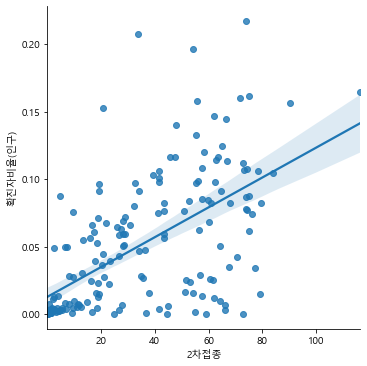

In [73]:
sns.lmplot(x='2Ï∞®Ï†ëÏ¢Ö', y='ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)', data=df_corona_all_n)
plt.show()

### Ïù∏Íµ¨Îãπ ÌôïÏßÑÏûê Î∞úÏÉù ÎπÑÏú®Í≥º Î∞±Ïã† Ï†ëÏ¢ÖÎ•† ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∑∏ÎûòÌîÑ Í∑∏Î†§Î≥¥Í∏∞

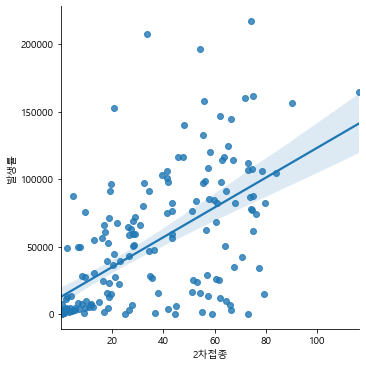

In [74]:
sns.lmplot(x='2Ï∞®Ï†ëÏ¢Ö', y='Î∞úÏÉùÎ•†', data=df_corona_all_n)
plt.show()

In [75]:
df_corona_all_n.corr()['2Ï∞®Ï†ëÏ¢Ö']['Î∞úÏÉùÎ•†']

0.5963209756874164

In [76]:
df_corona_all_n.corr()['2Ï∞®Ï†ëÏ¢Ö']['ÌôïÏßÑÏûêÎπÑÏú®(Ïù∏Íµ¨)']

0.5962873390099418

### 01 ÌòÑÏû¨ÍπåÏßÄÏùò ÎàÑÏ†ÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ Í≤∞Í≥º Î∞±Ïã† 2Ï∞® Ï†ëÏ¢ÖÎ•†Í≥º Ïù∏Íµ¨Îãπ ÌôïÏßÑÏßÄ ÎπÑÏú®ÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäîÎã§.
### 02 ÌòÑÏû¨ÍπåÏßÄÏùò ÎàÑÏ†ÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ Í≤∞Í≥º Î∞±Ïã† 2Ï∞® Ï†ëÏ¢ÖÎ•†Í≥º ÌôïÏßÑÏûê Î∞úÏÉù ÎπÑÏú®ÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäîÎã§.